# LAB 3 - Iris  

| Name | Nguyễn Cao Sơn  |
|------|------------|
| Student ID     | 21127159           |  

Import Libraries


In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Introduction  


In [2]:
iris = pd.read_csv('../data/Iris.csv')

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



  - Id : id
  - SepalLengthCm : Độ dài đài hoa
  - SepalWidthCm : Độ rộng đài hoa
  - PetalLengthCm : Độ dài cánh hoa
  - PetalWidthCm : Độ rộng cánh hoa
  - Species : Loại hoa  

## 2. Preprocessing

In [3]:
iris.shape

(150, 6)

Dữ liệu có 150 dòng và 6 cột. 
 
### Check missing data

In [4]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dữ liệu không có giá trị trống. 




In [5]:
iris = iris.drop('Id', axis=1)

In [6]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Check duplicate data

In [7]:
iris.duplicated().sum()

3

Dữ liệu đã không có dòng trùng lặp nào.  
## 3. Exploratory Data  
### Đầu tiên hãy xem chúng ta có bao nhiêu mẫu với mỗi loài hoa.  

In [8]:
iris["Species"].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Câu hỏi 1: Đâu là loài hoa có độ dài cánh hoa lớn nhất?

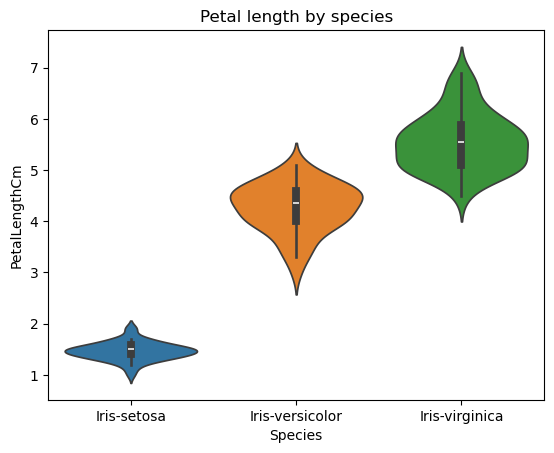

In [9]:
custom_palette = {"Iris-setosa": "blue", "Iris-versicolor": "orange", "Iris-virginica": "green"}

sns.violinplot(x="Species", y="PetalLengthCm", data=iris, hue="Species")\

plt.title("Petal length by species")

plt.show()


Nhận xét:  
- Loài hoa có độ dài cánh hoa lớn nhất là Iris-virginica với giá trị trung bình là khoảng `5.5`.  
- Loài hoa có độ dài cánh hoa nhỏ nhất là Iris-setosa với giá trị trung bình là khoảng `1.4`.  

### Câu hỏi 2: Đâu là loài hoa có độ rộng cánh hoa lớn nhất?



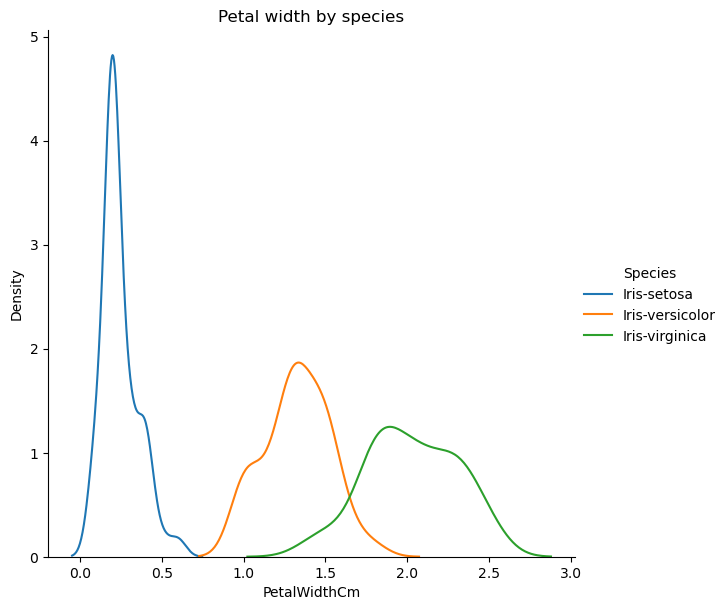

In [10]:
sns.FacetGrid(iris, hue="Species", height= 6) \
   .map(sns.kdeplot, "PetalWidthCm") \
   .add_legend()

plt.title("Petal width by species")
plt.show()

Nhận xét:  
Dù thay đổi sang một dạng biểu đồ khác nhưng ta vẫn có thể nhìn thấy phân bố mật bộ  chiều rộng cánh hoa của các loài hoa một cách khá rõ ràng.  
- Loài hoa có độ rộng cánh hoa lớn nhất là Iris-virginica với giá trị trung bình là khoảng `2.7` .
- Loài hoa có độ rộng cánh hoa nhỏ nhất là Iris-setosa với giá trị trung bình là khoảng `0.2`.

### Câu hỏi 3: Những yếu tố nào làm cho có khả năng phân loại hoa ?  
Ở đây chúng ta dùng Random Forest để xem xét độ quan trọng của các yếu tố.

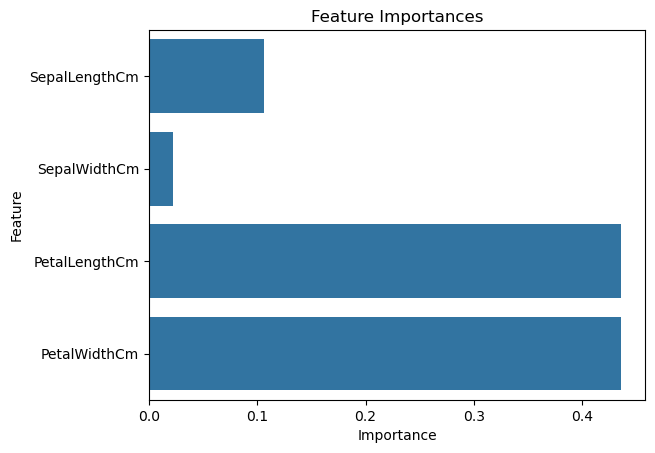

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Split features and target variable
X = iris.drop('Species', axis=1)
y = iris['Species']

# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

#Visualize feature importances
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Nhận xét:  
- Thông qua biểu đồ về độ quan trọng của các yếu tố, ta thấy rằng độ dài cánh hoa và độ rộng cánh hoa là hai yếu tố quan trọng nhất trong việc phân loại loài hoa. Sắp sau đó là đến độ dài đài hoa.  
- Độ rộng đài hoa là yếu tố không quá quan trọng trong việc phân loại loài hoa.